<a href="https://colab.research.google.com/github/audreyakwenye/DS-Unit-2-Sprint-4-Model-Validation/blob/master/DS_Unit_2_Sprint_Challenge_4_Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data Science Unit 2 Sprint Challenge 4 — Model Validation

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

## Predicting Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive.

The goal is to predict the last column, whether the donor made a donation in March 2007, using information about each donor's history. We'll measure success using recall score as the model evaluation metric.

Good data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need.

#### Run this cell to load the data:

In [84]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

df = df.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

df.head()
df.dtypes


months_since_last_donation     int64
number_of_donations            int64
total_volume_donated           int64
months_since_first_donation    int64
made_donation_in_march_2007    int64
dtype: object

In [0]:
import numpy as np

## Part 1.1 — Begin with baselines

What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You don't need to split the data into train and test sets yet. You can answer this question either with a scikit-learn function or with a pandas function.)

In [86]:
X = df.drop(columns='made_donation_in_march_2007')
y = df['made_donation_in_march_2007'] == 1

majority_class = y.mode()[0]
y_pred = np.full(shape=y.shape, fill_value=majority_class)

from sklearn.metrics import accuracy_score 
acc = accuracy_score(y, y_pred)
print('Accuracy SCore: ', acc)

Accuracy SCore:  0.7620320855614974


In [87]:
X.dtypes

months_since_last_donation     int64
number_of_donations            int64
total_volume_donated           int64
months_since_first_donation    int64
dtype: object

What **recall score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of recall.)

In [88]:
from sklearn.metrics import recall_score
rec = recall_score(y, y_pred, average='weighted') 
print('Recall Score: ', rec)

Recall Score:  0.7620320855614974


## Part 1.2 — Split data

In this Sprint Challenge, you will use "Cross-Validation with Independent Test Set" for your model evaluation protocol.

First, **split the data into `X_train, X_test, y_train, y_test`**, with random shuffle. (You can include 75% of the data in the train set, and hold out 25% for the test set.)


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, test_size=.25, random_state=None, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((561, 4), (187, 4), (561,), (187,))

## Part 2.1 — Make a pipeline

Make a **pipeline** which includes:
- Preprocessing with any scikit-learn [**Scaler**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- Feature selection with **[`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)([`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html))**
- Classification with [**`LogisticRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [90]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score 

pipeline = make_pipeline(
    StandardScaler(),
    SelectKBest(f_classif, k='all'),
    LogisticRegression(random_state=0, solver='lbfgs'))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print('New Accuracy Score: ', acc1)
print()
print('Roc_Auc Score: ', roc)
print()


New Accuracy Score:  0.8556149732620321

Roc_Auc Score:  0.5618609406952966



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [91]:
from sklearn.metrics import confusion_matrix



import matplotlib.pyplot as plt 
import seaborn as sns 

def confusion_viz(y_true, y_pred):
  matrix = confusion_matrix(y_true, y_pred)
  return sns.heatmap(matrix, annot=True,
                    fmt=',', linewidths=1, linecolor='grey',
                    square=True,
                    xticklabels=['Predicted\nNo', 'Predicted\nYes'],
                    yticklabels=['Actual\nNo', 'Actual\nYes'])

confusion_matrix(y_test, y_pred)

array([[156,   7],
       [ 20,   4]])

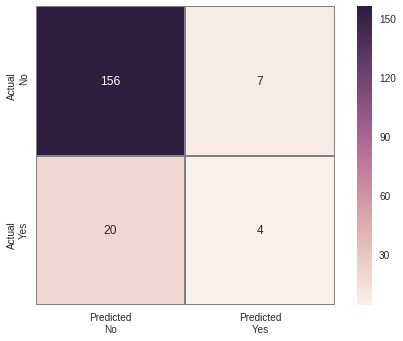

In [92]:
confusion_viz(y_test, y_pred)

## Part 2.2 — Do Grid Search Cross-Validation

Do [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with your pipeline. Use **5 folds** and **recall score**.

Include these **parameters for your grid:**

#### `SelectKBest`
- `k : 1, 2, 3, 4`

#### `LogisticRegression`
- `class_weight : None, 'balanced'`
- `C : .0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0`


**Fit** on the appropriate data.

In [0]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


In [116]:
pipe = make_pipeline(
    RobustScaler(), 
    SelectKBest(f_regression), 
    Ridge())

param_grid = {
    'selectkbest__k': (1, 2, 3, 4), 
    'ridge__alpha': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, 
                  scoring='neg_mean_absolute_error', 
                  verbose=1)

gs.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('selectkbest', SelectKBest(k=10, score_func=<function f_regression at 0x7f84f2a7a730>)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'selectkbest__k': (1, 2, 3, 4), 'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

## Part 3 — Show best score and parameters

Display your **best cross-validation score**, and the **best parameters** (the values of `k, class_weight, C`) from the grid search.

(You're not evaluated here on how good your score is, or which parameters you find. You're only evaluated on being able to display the information. There are several ways you can get the information, and any way is acceptable.)

In [118]:
validation_score = gs.best_score_
print()
print('Cross-Validation Score:', -validation_score)
print()
print('Best estimator:', gs.best_estimator_)
print()
print('Best Params:', gs.best_params_)
print()



Cross-Validation Score: 0.3545252126722372

Best estimator: Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('selectkbest', SelectKBest(k=4, score_func=<function f_regression at 0x7f84f2a7a730>)), ('ridge', Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

Best Params: {'ridge__alpha': 0.0001, 'selectkbest__k': 4}



## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <th colspan="2" rowspan="2"></th>
    <th colspan="2">Predicted</th>
  </tr>
  <tr>
    <th>Negative</th>
    <th>Positive</th>
  </tr>
  <tr>
    <th rowspan="2">Actual</th>
    <th>Negative</th>
    <td>85</td>
    <td>58</td>
  </tr>
  <tr>
    <th>Positive</th>
    <td>8</td>
    <td>36</td>
  </tr>
</table>

Calculate accuracy

In [120]:
accuracy = (36+8)/ (85+58+8+36)
print(accuracy)

0.6470588235294118


Calculate precision

In [122]:
precision = 36 / (85+36)
print(precision)

0.5944055944055944


Calculate recall

In [124]:
recall = 36 / (36+58)
print(recall)

0.9139784946236559


## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Add transformations in your pipeline and parameters in your grid, to try improving your cross-validation score.

### Part 3
Show names of selected features. Then do a final evaluation on the test set — what is the test score?

### Part 4
Calculate F1 score and False Positive Rate. 